In [0]:
import pandas as pd

In [2]:
customer = pd.read_excel(r"/content/drive/My Drive/capstone/Customer_Data.xlsx")
invoice = pd.read_csv(r"/content/drive/My Drive/capstone/Final_invoice.csv")
invoice.drop(columns="Unnamed: 0", inplace=True)
jtd = pd.read_csv(r"/content/drive/My Drive/capstone/JTD.csv")
jtd.drop(columns="Unnamed: 0", inplace=True)
plant = pd.read_excel(r"/content/drive/My Drive/capstone/Plant Master.xlsx")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data = pd.merge(pd.merge(customer, invoice, on="Customer No."), jtd, how="inner", left_on="Job Card No", right_on="DBM Order")

In [4]:
jtd.head

<bound method NDFrame.head of          DBM Order  Order Item  ... Target quantity UoM Net value
0            22385         180  ...                 MIN   1869.87
1            23910          10  ...                  EA   2151.13
2            23910          40  ...                  EA   2552.92
3            23910          60  ...                  EA  20360.14
4            23910          70  ...                  EA  10691.63
...            ...         ...  ...                 ...       ...
5619479     962813          50  ...                 MIN   1050.00
5619480     962813          60  ...                 MIN   1250.00
5619481     962813          70  ...                 MIN    223.00
5619482     962813          80  ...                 MIN    450.00
5619483     962813          90  ...                 MIN   2149.99

[5619484 rows x 9 columns]>

In [5]:
jtd['Description'].head(20)

0     MACHINING RR.SUSPENSION CHARGE  (MAJOR)
1              ASSY.OIL COOLER (6-PLATE) (VOR
2              FRONT WHEEL BEARING/ LUBRICATE
3             ASSY.CYL.HEAD W /O INJ.(NA W /O
4              Engine Overhaul Kit -Indica Di
5                              CYLINDER LINER
6               824.72 SY.CYL.HEAD COVER-PLAS
7           MACHINING CYLINDER HEAD  (DIESEL)
8          MACHINING CYLINDER BLOCK  (DIESEL)
9                    MISC_RECOVERABLE CHARGES
10             ASSY.AUXILLIARY WATER TANK (EN
11                              GLOW PLUG KIT
12              GEAR SHIFT LINKAGE BUSH KIT (
13                                 WATER PUMP
14                               COOLANT TANK
15                                COOLANT CAP
16                                       BOOT
17                                 CLUTCH KIT
18                         CLUTCH RELEASE BRG
19                                      VALVE
Name: Description, dtype: object

In [0]:
  def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent= (df.isnull().sum())/(df.isnull().count().sort_values(ascending=False))*100
    missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
    #.sort_values(by = 'percent', ascending = False)
    return missing_data

def drop_missing(dataset, missing,value):
    dataset = dataset.drop((missing[missing['percent'] > value]).index,axis= 1)
    print(dataset.isnull().sum().sort_values(ascending = False))
    return dataset 
    

In [7]:
miss_cus = missing_values(customer)
miss_invoice =missing_values(invoice)
miss_jtd =missing_values(jtd)
miss_plant = missing_values(plant)
print(miss_cus,miss_invoice,miss_jtd,miss_plant)

                   total    percent
Death date        554675  99.880613
Date of Birth     541894  97.579132
Occupation        540780  97.378533
Marital Status    539301  97.112209
Title              46307   8.338525
Data Origin          136   0.024490
Partner Type          78   0.014046
Customer No.           0   0.000000
Business Partner       0   0.000000                        total     percent
Service Advisor Name  492314  100.000000
Claim No.             487510   99.024200
Policy no.            475432   96.570888
Expiry Date           470083   95.484386
Insurance Company     468723   95.208140
Cash /Cashless Type   464894   94.430384
Gate Pass Date        451399   91.689247
Technician Name       236834   48.106290
IGST(5%)              197286   40.073205
CGST(9%)              197286   40.073205
Outstanding Amt       197286   40.073205
Total Value           197286   40.073205
ODN No.               197286   40.073205
IGST(12%)             197286   40.073205
IGST(18%)             197

In [8]:
miss_plant = missing_values(plant)
print(miss_plant)

                         total    percent
Vendor number plant        436  99.543379
Sales organization           5   1.141553
House number and street      2   0.456621
Name 2                       2   0.456621
PO Box                       1   0.228311
State                        0   0.000000
City                         0   0.000000
Postal Code                  0   0.000000
Factory calendar             0   0.000000
Customer no. - plant         0   0.000000
Valuation Area               0   0.000000
Name 1                       0   0.000000
Plant                        0   0.000000


In [9]:
miss_data = missing_values(data)
print(miss_data)

                       total  percent
Death date            154068    100.0
Date of Birth         154068    100.0
Service Advisor Name  154068    100.0
Occupation            154068    100.0
Marital Status        154068    100.0
...                      ...      ...
JobCard Time               0      0.0
JobCard Date               0      0.0
Job Card No                0      0.0
Invoice Time               0      0.0
Business Partner           0      0.0

[75 rows x 2 columns]


# Ownership of Car throughout the country

In [10]:
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import warnings
import math
import gc

warnings.filterwarnings('ignore')



pd.options.display.max_columns=99

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
cars = invoice[["Make", "Model", "Regn No"]].drop_duplicates().dropna()
duplicate_cars = cars[cars.duplicated("Regn No")].sort_values("Regn No")
final_cars = cars[~cars["Regn No"].isin(duplicate_cars["Regn No"])]
final_cars["Car"] = final_cars["Make"] + " " + final_cars["Model"]

In [12]:
final_cars.head()

,Make,Model,Regn No,Car
0,GENERAL MOTORS,SPARK,KA19MA1291,GENERAL MOTORS SPARK
1,TATA MOTORS,INDICA,MH43R3046,TATA MOTORS INDICA
2,MARUTI SUZUKI,ZEN,AP09AX0582,MARUTI SUZUKI ZEN
4,HYUNDAI,SANTRO XING,MH04CD9768,HYUNDAI SANTRO XING
5,TOYOTA,INNOVA,MH04GM2960,TOYOTA INNOVA


In [13]:
px.bar(
    final_cars["Car"].value_counts().iloc[:50][-1::-1].reset_index(),
    y="index",
    x="Car",
    template='plotly_dark',
    title={
        'text': "Top 20 Cars",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    labels={'Car':"Count", "index":""},
    orientation='h'
)

In [0]:
pd.set_option('display.max_rows', 75)

In [15]:
data.columns

Index(['Business Partner', 'Customer No.', 'Partner Type', 'Data Origin',
       'Title', 'Marital Status', 'Occupation', 'Date of Birth', 'Death date',
       'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'Area / Locality',
       'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'CITY',
       'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'District',
       'Expiry Date', 'Gate Pass Date', 'Gate Pass Time', 'IGST(12%)',
       'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
     

state wise owning

In [0]:
cars1 = invoice[["Make", "Model",'District']].dropna()

In [17]:
cars1['District']


0         Maharashtra
1         Maharashtra
2         Maharashtra
3         Maharashtra
4         Maharashtra
             ...     
492309     Tamil Nadu
492310     Tamil Nadu
492311     Tamil Nadu
492312     Tamil Nadu
492313     Tamil Nadu
Name: District, Length: 490789, dtype: object

In [0]:
st =['AP', 'AR', 'BR', 'CG', 'CH', 'AN', 'DL', 'DN', 'DD', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LD', 'LA', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OD','OR', 'PB', 'PY', 'RJ', 'SK', 'TN', 'TS', 'TR', 'UP', 'UK', 'WB']

Type of order in the company

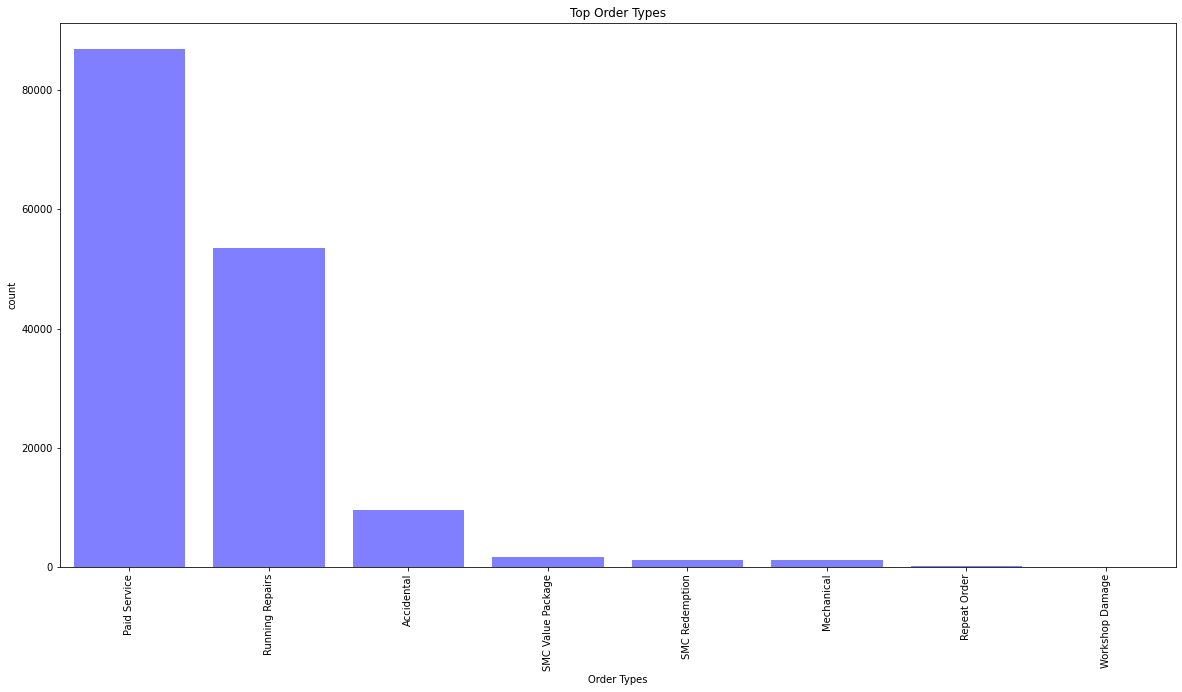

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="Order Type", data=data, order=data["Order Type"].value_counts().index, ax=ax, saturation=1, color="blue", alpha=0.5)
plt.xticks(rotation="90")
plt.title("Top Order Types")
plt.xlabel("Order Types")
plt.show()

In [0]:
data_cust_inv = pd.merge(customer, invoice, on="Customer No.")
cust_orderType = data_cust_inv[["Customer No.", "Order Type"]]

In [21]:
fig =px.bar(
    cust_orderType["Order Type"].value_counts().reset_index(),
    x="index",
    y="Order Type",
    template="plotly_white",
    title={
        "text" : "Top Order Types",
        "x" : 0.5,
        "y" : 0.85
    },
    labels={
        "index" : "Order Type",
        "Order Type" : "Count"
    }
)
fig.show()

Earning in different order types

In [0]:
ern_order = pd.DataFrame(invoice.groupby("Order Type")["Total Amt Wtd Tax."].sum())

In [23]:
px.bar(
    ern_order.sort_values("Total Amt Wtd Tax.", ascending=False)["Total Amt Wtd Tax."][:5].reset_index(),
    x="Order Type",
    y="Total Amt Wtd Tax.",
    template="plotly_white",
    title={
        "text" : "Top Order Types",
        "x" : 0.5,
        "y" : 0.85
    },
    labels={
        "Total Amt Wtd Tax." : "Total Revenue"
    }
)

In [24]:
px.bar(
    (invoice.groupby(by="District")["Total Amt Wtd Tax.", "Parts Total", "Labour Total", "Misc Total", "OSL Total"].sum()).sort_values("Total Amt Wtd Tax.", ascending=False).iloc[:10].unstack().reset_index(),
    x="District",
    y=0,
    color="level_0",
    barmode='group',
    template="plotly_white",
    title={
        "text" : "State Wise revenue",
        "x" : 0.5,
        "y" : 0.85
    },
    labels={
        "District" : "State",
        "0" : "Total",
        "level_0" : "Expence Type"
    }
)


In [0]:
most_osl_cat = invoice.groupby("Order Type")[["OSL Total"]].sum()
most_osl_cat = most_osl_cat[most_osl_cat["OSL Total"]>1000000]
most_osl_cat = most_osl_cat.sort_values("OSL Total", ascending=False).reset_index()

In [26]:
px.bar(
    most_osl_cat,
    x="Order Type",
    y="OSL Total",
    template="plotly_white",
    title={
        "text" : "Outsoursed work total",
        "x" : 0.5,
        "y" : 0.85
    }
)

In [27]:
plant.info

<bound method DataFrame.info of     Plant                          Name 1 Valuation Area Customer no. - plant  \
0    BC07                      NERKUNDRAM           BC07               PLBC07   
1    BC30              SAS NAGAR - MOHALI           BC30               PLBC30   
2    X001       X001 - AUTO PLANET WHEELS           X001               PLX001   
3    X002  X002 - BHANDARI INDUSTRIES PVT           X002               PLX002   
4    X003  X003 - Om Sri Satya Sai Automo           X003               PLX003   
..    ...                             ...            ...                  ...   
433  X780  X780 - SOKHI BROTHERS MOTOR DI           X780               PLX780   
434  X781           X781 - XPRESS SERVICE           X781               PLX781   
435  X789            X789 - ARYAN MOTORS            X789               PLX789   
436  X795                X795 - RS MOTORS           X795               PLX795   
437  X796       X796 - SINHA CARS PVT LTD           X796               PLX796

In [0]:
dist_order = pd.DataFrame(invoice.groupby("District")["Order Type"].value_counts())
dist_order = dist_order.rename(columns={"Order Type": "Count"})
g = dist_order[["Count"]].groupby(level=0, group_keys=False)
dist_order = g.apply(lambda x: x.sort_values("Count", ascending=False))
dist_order = dist_order.sort_values("Count", ascending=False)

In [29]:
px.bar(
    dist_order.reset_index(),
    x="District",
    y="Count",
    color="Order Type",
    template="plotly_white",
    title={
        "text" : "Statewise top order types",
        "x" : 0.5,
        "y" : 0.85
    },
    height=500,
    labels={
        "District":"State"
    }
)


In [0]:
invoice["Invoice Date"]=pd.to_datetime(invoice["Invoice Date"])
invoice["YearMon"] = invoice["Invoice Date"].map(lambda date: date.year*100 + date.month)

In [31]:
inv_income = invoice.groupby(["YearMon"])["Total Amt Wtd Tax."].sum().reset_index()
plot_data = [
    go.Scatter(
        x = inv_income["YearMon"],
        y = inv_income["Total Amt Wtd Tax."],
    )
]

plot_layout = go.Layout(
    xaxis={
        "type": "category",
        "title" : "YYYYMM"
    },
    yaxis={
        "title" : "Revenue"
    },
    title = {
        "text" : "Monthly Revenue",
        "x" : 0.5,
        "y" : 0.85
    },
    template="plotly_white"
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [32]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant                    438 non-null    object 
 1   Name 1                   438 non-null    object 
 2   Valuation Area           438 non-null    object 
 3   Customer no. - plant     438 non-null    object 
 4   Vendor number plant      2 non-null      object 
 5   Factory calendar         438 non-null    object 
 6   Name 2                   436 non-null    object 
 7   House number and street  436 non-null    object 
 8   PO Box                   437 non-null    float64
 9   Postal Code              438 non-null    int64  
 10  City                     438 non-null    object 
 11  Sales organization       433 non-null    object 
 12  State                    438 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 44.6+ KB


In [47]:
jtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619484 entries, 0 to 5619483
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DBM Order            int64  
 1   Order Item           int64  
 2   Material             object 
 3   Labor Value Number   object 
 4   Description          object 
 5   Item Category        object 
 6   Order Quantity       float64
 7   Target quantity UoM  object 
 8   Net value            float64
dtypes: float64(2), int64(2), object(5)
memory usage: 385.9+ MB


In [48]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Amt Rcvd From Custom  295028 non-null  float64       
 1   Amt Rcvd From Ins Co  295028 non-null  float64       
 2   Area / Locality       468424 non-null  object        
 3   CGST(14%)             295028 non-null  float64       
 4   CGST(2.5%)            295028 non-null  float64       
 5   CGST(6%)              295028 non-null  float64       
 6   CGST(9%)              295028 non-null  float64       
 7   CITY                  492313 non-null  object        
 8   Cash /Cashless Type   27420 non-null   object        
 9   Claim No.             4804 non-null    object        
 10  Cust Type             492314 non-null  object        
 11  Customer No.          492314 non-null  object        
 12  District              492314 non-null  object        
 13 

In [0]:
master= pd.read_csv('/content/drive/My Drive/capstone/invoice_customer_plant_jtd (1).csv')

In [44]:
jtd['Description'].value_counts()[:5]

MISC_OTHER CHARGES    270563
Paid Service-Minor    201857
WASHING               199068
Wheel Alignment       191211
OIL FILTER            154387
Name: Description, dtype: int64

In [46]:
fig =px.bar(
    jtd['Description'].value_counts()[:30].reset_index(),
    
    x="index",
    y='Description',
    template="plotly_white",
    title={
        "text" : "Top Order Types",
        "x" : 0.5,
        "y" : 0.85
    },
    labels={
        "index" : "Order Type",
        "Order Type" : "Count"
    }
)
fig.show()

In [51]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255721 entries, 0 to 255720
Data columns (total 86 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Amt Rcvd From Custom     76310 non-null   float64
 1   Amt Rcvd From Ins Co     76310 non-null   float64
 2   Area / Locality          253043 non-null  object 
 3   CGST(14%)                76310 non-null   float64
 4   CGST(2.5%)               76310 non-null   float64
 5   CGST(6%)                 76310 non-null   float64
 6   CGST(9%)                 76310 non-null   float64
 7   CITY                     255720 non-null  object 
 8   Cash /Cashless Type      7111 non-null    object 
 9   Claim No.                545 non-null     object 
 10  Cust Type                255721 non-null  object 
 11  Customer No.             255721 non-null  object 
 12  District                 255721 non-null  object 
 13  Expiry Date              19517 non-null   object 
 14  Gate

In [0]:
dfq =pd.DataFrame(invoice.groupby("Make")["Labour Total"].mean())


In [58]:
dfq.sort_values("Make")

,Labour Total
Make,
AUDI,8.889990e+05
BMW,6.417833e+05
DAEWOO,2.741241e+05
FIAT,5.167016e+06
FORCE,3.310072e+05
FORD,1.999079e+07
GENERAL MOTORS,3.186325e+07
HINDUSTAN MOTORS,3.682493e+05
HONDA,1.361357e+07


In [71]:
px.bar(
    dfq.sort_values("Labour Total",ascending=False).reset_index(),
    x="Make",
    y="Labour Total",
    template="plotly_white",
    title={
        "text" : "Labor Charges",
        "x" : 0.5,
        "y" : 0.85
    }
)

In [69]:
invoice['Parts Total']

0         2348.75
1            0.00
2           52.95
3            0.00
4          944.16
           ...   
492309    1587.28
492310    4388.61
492311    6588.79
492312       0.00
492313       0.00
Name: Parts Total, Length: 492314, dtype: float64

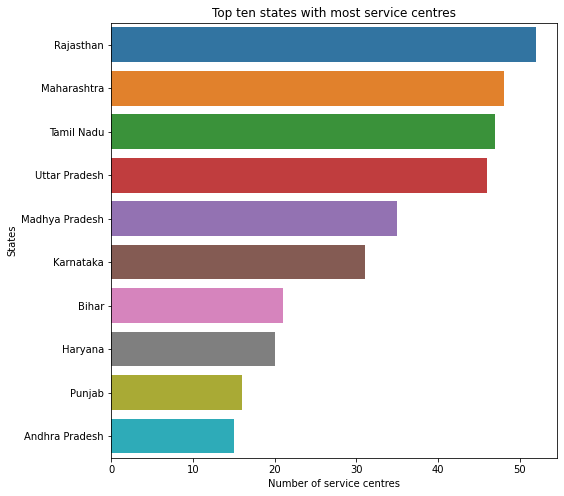

In [75]:
plt.figure(figsize=(8,8),edgecolor='b')
plt.xlabel('Number of service centres')
plt.ylabel('States')
plt.title('Top ten states with most service centres')
sns.barplot(y=plant['State'].value_counts()[:10].index,
            x=plant['State'].value_counts()[:10].values)

In [0]:
def make_pivot_bar(dataframe, index, values, aggfunc, graph_type, color):
    global pivot_table
    pivot_table = pd.pivot_table(data = dataframe, index = index, values = values,
                                 aggfunc = aggfunc).reset_index().sort_values(by = values, ascending = False)
    fig = px.bar(pivot_table, x = pivot_table[index], y = pivot_table[values], color = color)
    title = "{} Amount spent by {}.".format(graph_type,index)
    fig.update_layout(title = title, width = 1000, height = 900)
    fig.show()

In [81]:
#Bar graph for average amount spent by make
make_pivot_bar(master, 'Make', 'Total Amt Wtd Tax.', np.mean, 'Average', 'Total Amt Wtd Tax.')